Get started with Dataset

In [30]:
# ALL INCLUDES

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn import metrics

import os

In [31]:
INPUT_SIGNAL_TYPES = [
    "body_acc_x_",
    "body_acc_y_",
    "body_acc_z_",
    "body_gyro_x_",
    "body_gyro_y_",
    "body_gyro_z_",
    "total_acc_x_",
    "total_acc_y_",
    "total_acc_z_"
]

In [32]:
DATASET_PATH = "UCI HAR Dataset/"
TRAIN = "train/"
TEST = "test/"

def load_X(X_signals_paths):
    X_signals = []
    
    for signal_type_path in X_signals_paths:
        file = open(signal_type_path, "r")
        X_signals.append(
            [np.array(series, dtype=np.float32) for series in [
                row.replace('  ', ' ').strip().split(' ') for row in file 
            ]]
        )
        file.close()
    
    return np.transpose(np.array(X_signals), (1, 2, 0))

X_train_signals_paths = [
    DATASET_PATH + DATASET_PATH + TRAIN + "Inertial Signals/" + signal + "train.txt" for signal in INPUT_SIGNAL_TYPES
]

X_test_signals_paths = [
    DATASET_PATH + DATASET_PATH + TEST + "Inertial Signals/" + signal + "test.txt" for signal in INPUT_SIGNAL_TYPES
]

X_train = load_X(X_train_signals_paths)
X_test = load_X(X_test_signals_paths)


def load_y(y_path):
    file = open(y_path, "r")
    
    y_ = np.array(
        [elem for elem in [
            row.replace('  ', ' ').strip().split(' ') for row in file
        ]],
        dtype=np.float32
    )
    
    file.close()
    
    return y_ - 1

y_train_path = DATASET_PATH + DATASET_PATH + TRAIN + "y_train.txt"
y_test_path = DATASET_PATH + DATASET_PATH + TEST + "y_test.txt"

y_train = load_y(y_train_path)
y_test = load_y(y_test_path)

In [33]:
# Understanding the DataSet

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (7352, 128, 9), y_train shape: (7352, 1)
X_test shape: (2947, 128, 9), y_test shape: (2947, 1)


In [34]:
print(X_train)

[[[ 1.808515e-04  1.076681e-02  5.556068e-02 ...  1.012817e+00
   -1.232167e-01  1.029341e-01]
  [ 1.013856e-02  6.579480e-03  5.512483e-02 ...  1.022833e+00
   -1.268756e-01  1.056872e-01]
  [ 9.275574e-03  8.928878e-03  4.840473e-02 ...  1.022028e+00
   -1.240037e-01  1.021025e-01]
  ...
  [-1.147484e-03  1.714439e-04  2.647864e-03 ...  1.018445e+00
   -1.240696e-01  1.003852e-01]
  [-2.222655e-04  1.574181e-03  2.381057e-03 ...  1.019372e+00
   -1.227451e-01  9.987355e-02]
  [ 1.575500e-03  3.070189e-03 -2.269757e-03 ...  1.021171e+00
   -1.213260e-01  9.498741e-02]]

 [[ 1.093752e-03 -4.687588e-03 -2.685954e-02 ...  1.018851e+00
   -1.239760e-01  9.792958e-02]
  [ 4.550077e-03 -7.487894e-03 -2.509841e-02 ...  1.022380e+00
   -1.268078e-01  9.935086e-02]
  [ 2.879173e-03 -8.429991e-03 -2.597534e-02 ...  1.020781e+00
   -1.277862e-01  9.811381e-02]
  ...
  [-4.646144e-03 -5.479850e-03 -2.996671e-04 ...  1.014788e+00
   -1.290268e-01  9.353520e-02]
  [-2.941333e-03 -2.987481e-03 -4.88

In [35]:
X_train_df = pd.DataFrame(X_train.reshape(X_train.shape[0], -1))
X_test_df = pd.DataFrame(X_test.reshape(X_test.shape[0], -1)) # flatten time-series into columns

y_train_df = pd.DataFrame(y_train, columns=['Acitivity'])
y_test_df = pd.DataFrame(y_test, columns=['Acitivity'])

# print("X_train sample:")
# X_train_df.head()
# print("\nX_train shape:")
# print(X_train_df.shape)
# print("\nX_train summary:")
# print(X_train_df.describe())
#

print("\ny_train summary:")
y_train_df.describe()


y_train summary:


,Acitivity
count,7352.000000
mean,2.643362
std,1.744802
min,0.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,5.000000


In [36]:
print("\ny_train sample:")
y_train_df['Acitivity'].unique()


y_train sample:


array([4., 3., 5., 0., 2., 1.], dtype=float32)

traiing with ML algo

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns


X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
y_train_copy = y_train.copy()
y_test_copy = y_test.copy()

# we normalize the features, which is important for distance based algorithms

X_train_reshaped = X_train_copy.reshape(-1, X_train.shape[2])
X_test_reshaped = X_test_copy.reshape(-1, X_test.shape[2])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

X_train = X_train_scaled.reshape(7352, 128, 9)
X_test = X_test_scaled.reshape(2947, 128, 9)

X_train_flat = X_train.reshape(7352, -1)
X_test_flat = X_test.reshape(2947, -1)

y_train_copy = y_train_copy.ravel()
y_test_copy = y_test_copy.ravel()

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_flat, y_train_copy)


RandomForestClassifier(random_state=42)

Accuracy: 0.8439


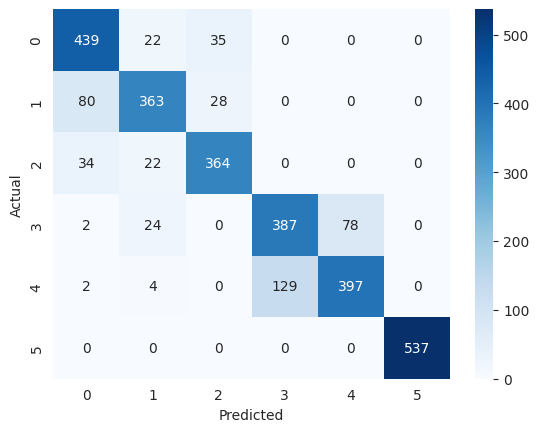

In [38]:
y_pred = clf.predict(X_test_flat)
accuracy = accuracy_score(y_test_copy, y_pred)
print(f"Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test_copy, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Training with SVM


In [39]:
from sklearn import svm

X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
y_train_copy = y_train.copy()
y_test_copy = y_test.copy()


# reshape each 128x9 input into 1D array
X_train_flat = X_train_copy.reshape(X_train_copy.shape[0], -1)
X_test_flat = X_test_copy.reshape(X_test_copy.shape[0], -1)

scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train_flat)
X_test_flat = scaler.transform(X_test_flat)

y_train_copy = y_train_copy.ravel()
y_test_copy = y_test_copy.ravel()

svm_model = svm.SVC(kernel='rbf')
svm_model.fit(X_train_flat, y_train_copy)

SVC()

In [40]:
y_pred = svm_model.predict(X_test_flat)

svm_accuracy = accuracy_score(y_test_copy, y_pred)
print(f"SVM Accuracy: {svm_accuracy:.4f}")

SVM Accuracy: 0.9013


### Training with LSTM

In [41]:
# setting up the parameters

X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
y_train_copy = y_train.copy()
y_test_copy = y_test.copy()

training_data_count = len(X_train_copy)
test_data_count = len(X_test_copy)
n_steps = len(X_train[0])
n_input = len(X_train[0][0])

# LSTM architecture
n_hidden = 32 # hidden layers
n_classes = 6 # total classes



# Some debugging info

print("Some useful info to get an insight on dataset's shape and normalisation:")
print("(X shape, y shape, every X's mean, every X's standard deviation)")
print(X_test.shape, y_test.shape, np.mean(X_test_copy), np.std(X_test_copy))
print("The dataset is therefore properly normalised, as expected, but not yet one-hot encoded.")

Some useful info to get an insight on dataset's shape and normalisation:
(X shape, y shape, every X's mean, every X's standard deviation)
(2947, 128, 9) (2947, 1) -0.007153686 0.95341825
The dataset is therefore properly normalised, as expected, but not yet one-hot encoded.


In [42]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()
y_train_copy = y_train.copy()
y_test_copy = y_test.copy()

# one hot encode
y_train_one_hot = to_categorical(y_train_copy, num_classes=6)
y_test_one_hot = to_categorical(y_test_copy, num_classes=6)

scaler = StandardScaler()

# Reshape each time-step separately for scaling (keeping samples & timesteps)
num_samples, time_steps, num_features = X_train_copy.shape

X_train_reshaped = X_train_copy.reshape(-1, num_features)  # Reshape for scaling
X_train_scaled = scaler.fit_transform(X_train_reshaped).reshape(num_samples, time_steps, num_features)

X_test_reshaped = X_test_copy.reshape(-1, num_features)  # Apply same scaling
X_test_scaled = scaler.transform(X_test_reshaped).reshape(X_test_copy.shape)


model = models.Sequential([
    layers.LSTM(128, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    layers.LSTM(128, return_sequences=False),
    layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Define the missing callback class to print accuracy per epoch
class PrintEpochAccuracy(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        train_acc = logs.get('accuracy', 0)
        val_acc = logs.get('val_accuracy', 0)
        print(f"Epoch {epoch + 1}: Train Accuracy = {train_acc:.4f}, Validation Accuracy = {val_acc:.4f}")
        

history = model.fit(X_train_scaled, y_train_one_hot,
                    epochs=10,
                    batch_size=1500,
                    validation_data=(X_test_scaled, y_test_one_hot),
                    callbacks=[PrintEpochAccuracy()])
                    
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

LSTM_acc = accuracy_score(np.argmax(y_test_one_hot, axis=1), y_pred_classes)
print(f"LSTM Accuracy: {LSTM_acc}")

Epoch 1/10


W0000 00:00:1741612926.992838    7200 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/notvisal/Desktop/InternProj/HAR-test/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 567ms/step - accuracy: 0.3613 - loss: 1.7127Epoch 1: Train Accuracy = 0.4731, Validation Accuracy = 0.5504
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 735ms/step - accuracy: 0.3799 - loss: 1.6957 - val_accuracy: 0.5504 - val_loss: 1.3699
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 558ms/step - accuracy: 0.5823 - loss: 1.3023Epoch 2: Train Accuracy = 0.5982, Validation Accuracy = 0.5283
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 689ms/step - accuracy: 0.5850 - loss: 1.2920 - val_accuracy: 0.5283 - val_loss: 1.1601
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 547ms/step - accuracy: 0.6099 - loss: 1.0483Epoch 3: Train Accuracy = 0.5985, Validation Accuracy = 0.5633
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 671ms/step - accuracy: 0.6080 - loss: 1.0437 - val_accuracy: 0.5633 - val_loss: 1.0400
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 565ms/step - accuracy: 0.6545 - loss: 0.8645Epoch 4: Train Accuracy = 0.6797, Validation Accuracy = 0.6491
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 688ms/step - accuracy: 0.6587 - loss: 0.8580 - val_acc